In [1]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

,Film_title,Release_year,Director,Genres,Owner_rating,Average_rating,Runtime,Countries,Original_Language,Spoken_Languages,Watches,List_Appearances,Likes,Cast,Studios,Letterboxd URL
0,Bullet Train,2022,David Leitch,"['Thriller', 'Comedy', 'Action']",3.5,3.52,127,['USA'],English,"['English', 'Japanese', 'Russian', 'Spanish']",1052879,132772,341008,"['Brad Pitt', 'Joey King', 'Aaron Taylor-Johns...","['87North Productions', 'Columbia Pictures']",https://letterboxd.com//film/bullet-train/
1,Rocky,1976,John G. Avildsen,"['Drama', 'Romance']",4.0,4.07,119,['USA'],English,['English'],715814,122325,189317,"['Sylvester Stallone', 'Talia Shire', 'Burt Yo...",['Winkler Films'],https://letterboxd.com//film/rocky/
2,Spider-Man: Into the Spider-Verse,2018,"Rodney Rothman, Peter Ramsey","['Adventure', 'Animation', 'Science Fiction', ...",4.5,4.43,117,['USA'],English,"['English', 'Japanese', 'Spanish']",2755433,404099,1424981,"['Shameik Moore', 'Jake Johnson', 'Hailee Stei...","['Columbia Pictures', 'Lord Miller', 'Pascal P...",https://letterboxd.com//film/spider-man-into-t...
3,Spider-Man,2002,Sam Raimi,"['Action', 'Fantasy']",4.0,3.75,121,['USA'],English,['English'],1920184,203552,483467,"['Tobey Maguire', 'Willem Dafoe', 'Kirsten Dun...","['Marvel Enterprises', 'Laura Ziskin Productio...",https://letterboxd.com//film/spider-man/
4,Spider-Man: Across the Spider-Verse,2023,"Joaquim Dos Santos, Justin K. Thompson","['Animation', 'Science Fiction', 'Adventure', ...",5.0,4.49,140,['USA'],English,"['English', 'Hindi', 'Italian', 'Spanish']",1515986,299753,787855,"['Shameik Moore', 'Hailee Steinfeld', 'Jason S...","['Columbia Pictures', 'Sony Pictures Animation...",https://letterboxd.com//film/spider-man-across...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,The Godfather: Part II,1974,Francis Ford Coppola,"['Crime', 'Drama']",5.0,4.59,202,['USA'],English,"['English', 'Italian', 'Latin', 'Spanish']",932408,188034,333545,"['Al Pacino', 'Robert Duvall', 'Diane Keaton',...","['Paramount', 'The Coppola Company']",https://letterboxd.com//film/the-godfather-par...
386,A Clockwork Orange,1971,Stanley Kubrick,"['Science Fiction', 'Crime']",4.5,4.13,137,"['UK', 'USA']",English,['English'],1176461,211590,385778,"['Malcolm McDowell', 'Patrick Magee', 'Adrienn...","['Warner Bros. Pictures', 'Hawk Films']",https://letterboxd.com//film/a-clockwork-orange/
387,Rosemary's Baby,1968,Roman Polanski,"['Horror', 'Drama', 'Thriller']",4.0,4.20,138,['USA'],English,['English'],485638,149025,154168,"['Mia Farrow', 'John Cassavetes', 'Ruth Gordon...",['William Castle Productions'],https://letterboxd.com//film/rosemarys-baby/
388,2001: A Space Odyssey,1968,Stanley Kubrick,"['Adventure', 'Mystery', 'Science Fiction']",3.5,4.31,149,"['UK', 'USA']",English,"['English', 'Russian']",1108129,266031,398034,"['Keir Dullea', 'Gary Lockwood', 'William Sylv...","['Stanley Kubrick Productions', 'Metro-Goldwyn...",https://letterboxd.com//film/2001-a-space-odys...


In [ ]:
#indroduction of dataset
#scraping, exploring the dataset, visualization and analysis

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('cs210.csv')

# Display the first few rows of the DataFrame
display(df)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         390 non-null    object 
 1   Release_year       390 non-null    int64  
 2   Director           390 non-null    object 
 3   Genres             390 non-null    object 
 4   Owner_rating       382 non-null    float64
 5   Average_rating     390 non-null    float64
 6   Runtime            390 non-null    int64  
 7   Countries          390 non-null    object 
 8   Original_Language  390 non-null    object 
 9   Spoken_Languages   390 non-null    object 
 10  Watches            390 non-null    int64  
 11  List_Appearances   390 non-null    int64  
 12  Likes              390 non-null    int64  
 13  Cast               390 non-null    object 
 14  Studios            390 non-null    object 
 15  Letterboxd URL     390 non-null    object 
dtypes: float64(2), int64(5), o

In [3]:
df.head()

,Film_title,Release_year,Director,Genres,Owner_rating,Average_rating,Runtime,Countries,Original_Language,Spoken_Languages,Watches,List_Appearances,Likes,Cast,Studios,Letterboxd URL
0,Bullet Train,2022,David Leitch,"['Thriller', 'Comedy', 'Action']",3.5,3.52,127,['USA'],English,"['English', 'Japanese', 'Russian', 'Spanish']",1052879,132772,341008,"['Brad Pitt', 'Joey King', 'Aaron Taylor-Johns...","['87North Productions', 'Columbia Pictures']",https://letterboxd.com//film/bullet-train/
1,Rocky,1976,John G. Avildsen,"['Drama', 'Romance']",4.0,4.07,119,['USA'],English,['English'],715814,122325,189317,"['Sylvester Stallone', 'Talia Shire', 'Burt Yo...",['Winkler Films'],https://letterboxd.com//film/rocky/
2,Spider-Man: Into the Spider-Verse,2018,"Rodney Rothman, Peter Ramsey","['Adventure', 'Animation', 'Science Fiction', ...",4.5,4.43,117,['USA'],English,"['English', 'Japanese', 'Spanish']",2755433,404099,1424981,"['Shameik Moore', 'Jake Johnson', 'Hailee Stei...","['Columbia Pictures', 'Lord Miller', 'Pascal P...",https://letterboxd.com//film/spider-man-into-t...
3,Spider-Man,2002,Sam Raimi,"['Action', 'Fantasy']",4.0,3.75,121,['USA'],English,['English'],1920184,203552,483467,"['Tobey Maguire', 'Willem Dafoe', 'Kirsten Dun...","['Marvel Enterprises', 'Laura Ziskin Productio...",https://letterboxd.com//film/spider-man/
4,Spider-Man: Across the Spider-Verse,2023,"Joaquim Dos Santos, Justin K. Thompson","['Animation', 'Science Fiction', 'Adventure', ...",5.0,4.49,140,['USA'],English,"['English', 'Hindi', 'Italian', 'Spanish']",1515986,299753,787855,"['Shameik Moore', 'Hailee Steinfeld', 'Jason S...","['Columbia Pictures', 'Sony Pictures Animation...",https://letterboxd.com//film/spider-man-across...


In [4]:
#give the statistical summary of numerical columns
df.describe()

,Release_year,Owner_rating,Average_rating,Runtime,Watches,List_Appearances,Likes
count,390.000000,382.000000,390.000000,390.000000,3.900000e+02,390.000000,3.900000e+02
mean,2008.651282,3.844241,3.655487,126.330769,1.140093e+06,136739.310256,3.250259e+05
std,10.903241,0.674785,0.533571,25.932200,6.615169e+05,89584.869973,2.830263e+05
min,1960.000000,2.000000,1.930000,77.000000,6.032000e+03,213.000000,2.270000e+02
25%,2004.000000,3.500000,3.330000,108.000000,5.972165e+05,61995.500000,1.147618e+05
50%,2011.000000,4.000000,3.730000,123.000000,1.027770e+06,122321.000000,2.384370e+05
75%,2016.000000,4.500000,4.080000,140.000000,1.590898e+06,196103.500000,4.488160e+05
max,2023.000000,5.000000,4.590000,327.000000,3.109060e+06,458748.000000,1.794850e+06


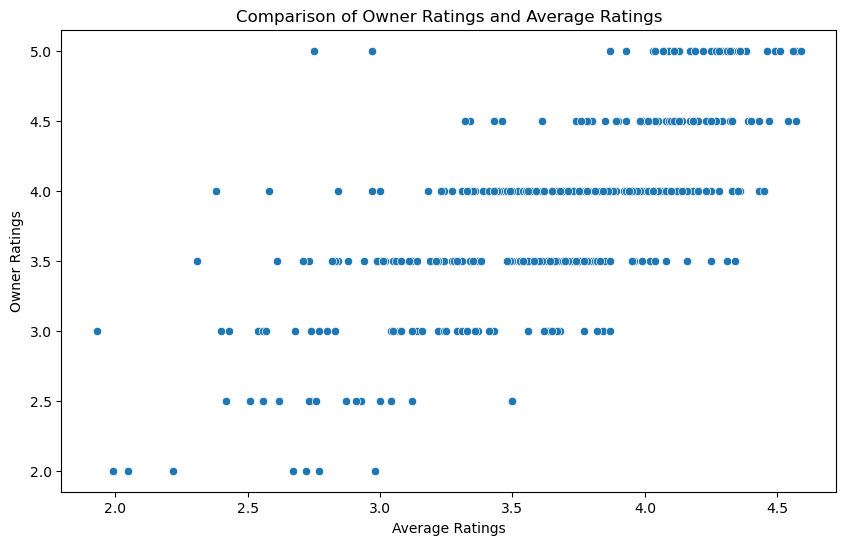

In [5]:
# Scatter plot comparing Owner_rating and Average_rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_rating', y='Owner_rating', data=df)
plt.title('Comparison of Owner Ratings and Average Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Owner Ratings')
plt.show()


In [6]:
#top 10 most watched movies on Letterboxd that you have watched


# Sort the DataFrame by the 'Watches' column in descending order
top_watched = df.sort_values(by='Watches', ascending=False)

# Display the top 10 most watched movies
top_10_watched = top_watched.head(10)
print("\nTop 10 Most Watched Movies:")
print(top_10_watched[['Film_title', 'Watches']])



Top 10 Most Watched Movies:
                            Film_title  Watches
87                            Parasite  3109060
78                               Joker  3070594
335                         Fight Club  2976307
24                     The Dark Knight  2874845
41                           Inception  2827697
2    Spider-Man: Into the Spider-Verse  2755433
39                        Interstellar  2742442
363                       Pulp Fiction  2736499
14                             Get Out  2698024
102             Avengers: Infinity War  2602138


In [7]:
#top 10 leats watched movies on Letterboxd that I have watched

# Sort the DataFrame by the 'Watches' column in ascending order
least_watched = df.sort_values(by='Watches', ascending=True)

# Display the top 10 least watched movies
top_10_least_watched = least_watched.head(10)
print("\nTop 10 Least Watched Movies:")
display(top_10_least_watched[['Film_title', 'Watches']])



Top 10 Least Watched Movies:


,Film_title,Watches
266,Beyaz Melek,6032
200,Celal and Ceren,13938
22,Muslum,18500
348,Innocence,24757
281,Destiny,27547
291,My Father and My Son,33501
108,Arif V 216,33569
75,Miracle in Cell No. 7,77989
99,Capernaum,93768
226,Detachment,118901


In [8]:
# Count the occurrences of each director
director_counts = df['Director'].value_counts()

# Display the top 10 directors
top_10_directors = director_counts.head(10)
print("\nTop 10 Directors You Have Watched:")
print(top_10_directors)



Top 10 Directors You Have Watched:
Director
Christopher Nolan    11
Martin Scorsese       9
Quentin Tarantino     7
Steven Spielberg      7
Peter Jackson         7
David Fincher         7
Denis Villeneuve      7
Bryan Singer          6
Zack Snyder           5
David Yates           5
Name: count, dtype: int64


In [9]:

# Combine all actors from the 'Cast' column into a single list
all_actors = [actor.split(', ') for actor in df['Cast'].dropna()]
all_actors_flat = [actor for sublist in all_actors for actor in sublist]

# Count the occurrences of each actor
actor_counts = pd.Series(all_actors_flat).value_counts()

# Display the top 10 actors
top_10_actors = actor_counts.head(10)
print("\nTop 10 Actors You Have Watched:")
print(top_10_actors)



Top 10 Actors You Have Watched:
'Stan Lee'              33
'Samuel L. Jackson'     24
'John Ratzenberger'     15
'Warwick Davis'         13
'Andy Serkis'           12
'Mickie McGowan'        12
'Scarlett Johansson'    12
'Bob Bergen'            11
'Jess Harnell'          11
'Michael Caine'         11
Name: count, dtype: int64


In [10]:

# Sort the DataFrame by the 'Owner_rating' column in descending order
top_rated_movies = df.sort_values(by='Owner_rating', ascending=False)

# Display the top 10 movies according to your ratings and their average ratings
top_10_rated_movies = top_rated_movies.head(10)
print("\nTop 10 Movies According to Your Ratings:")
print(top_10_rated_movies[['Film_title', 'Owner_rating', 'Average_rating']])



Top 10 Movies According to Your Ratings:
                Film_title  Owner_rating  Average_rating
321            The Pianist           5.0            4.35
43                 Memento           5.0            4.17
112      Blade Runner 2049           5.0            4.13
29            The Departed           5.0            4.29
346      Life Is Beautiful           5.0            4.32
32     Catch Me If You Can           5.0            4.03
35               Gladiator           5.0            4.08
37   Manchester by the Sea           5.0            4.09
39            Interstellar           5.0            4.31
41               Inception           5.0            4.18


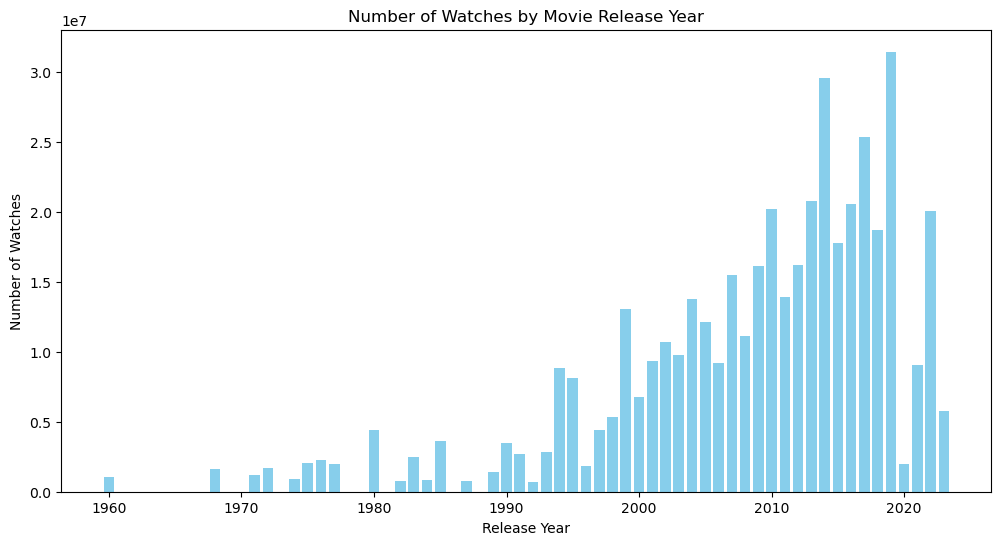

In [11]:
# Group by Release Year and sum the Watches for each year
yearly_watches = df.groupby('Release_year')['Watches'].sum()

# Plotting the bar plot
plt.figure(figsize=(12, 6))
plt.bar(yearly_watches.index, yearly_watches.values, color='skyblue')
plt.title('Number of Watches by Movie Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Watches')
plt.show()


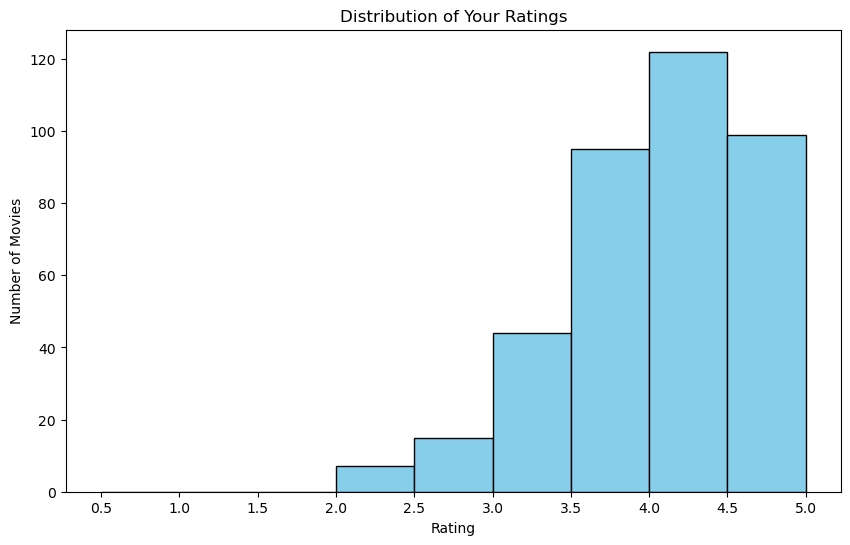

In [12]:
# Plotting the histogram of your ratings
plt.figure(figsize=(10, 6))
plt.hist(df['Owner_rating'], bins=[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], edgecolor='black', color='skyblue')
plt.title('Distribution of Your Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.xticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()


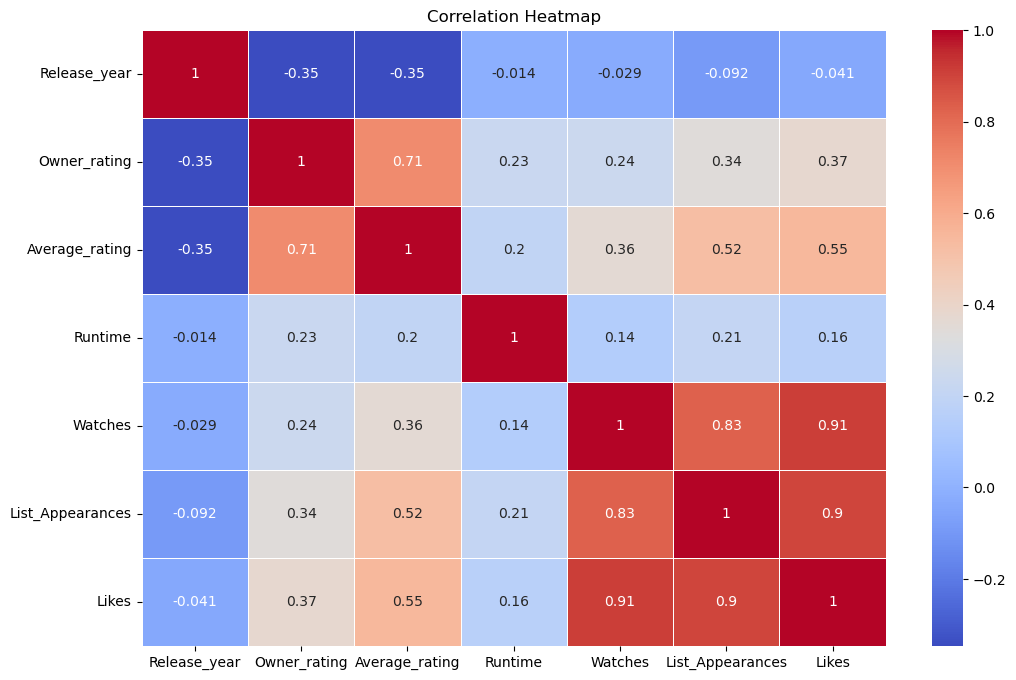

In [13]:

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [14]:
#machine learning part
#Understanding the Dataset:

# Display the shape of the dataset
dataset_shape = df.shape
print("Dataset Shape (Number of Samples & Number of Attributes):", dataset_shape)


Dataset Shape (Number of Samples & Number of Attributes): (390, 16)


In [15]:
# Display variable names
variable_names = df.columns
print("Variable Names:")
print(variable_names)


Variable Names:
Index(['Film_title', 'Release_year', 'Director', 'Genres', 'Owner_rating',
       'Average_rating', 'Runtime', 'Countries', 'Original_Language',
       'Spoken_Languages', 'Watches', 'List_Appearances', 'Likes', 'Cast',
       'Studios', 'Letterboxd URL'],
      dtype='object')


In [16]:
# Display the summary of the dataset
df_info = df.info()
print(df_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         390 non-null    object 
 1   Release_year       390 non-null    int64  
 2   Director           390 non-null    object 
 3   Genres             390 non-null    object 
 4   Owner_rating       382 non-null    float64
 5   Average_rating     390 non-null    float64
 6   Runtime            390 non-null    int64  
 7   Countries          390 non-null    object 
 8   Original_Language  390 non-null    object 
 9   Spoken_Languages   390 non-null    object 
 10  Watches            390 non-null    int64  
 11  List_Appearances   390 non-null    int64  
 12  Likes              390 non-null    int64  
 13  Cast               390 non-null    object 
 14  Studios            390 non-null    object 
 15  Letterboxd URL     390 non-null    object 
dtypes: float64(2), int64(5), o

In [17]:
# Display the first 5 rows of the dataset
first_5_rows = df.head()
print("First 5 Rows of the Dataset:")
print(first_5_rows)


First 5 Rows of the Dataset:
                            Film_title  Release_year  \
0                         Bullet Train          2022   
1                                Rocky          1976   
2    Spider-Man: Into the Spider-Verse          2018   
3                           Spider-Man          2002   
4  Spider-Man: Across the Spider-Verse          2023   

                                 Director  \
0                            David Leitch   
1                        John G. Avildsen   
2            Rodney Rothman, Peter Ramsey   
3                               Sam Raimi   
4  Joaquim Dos Santos, Justin K. Thompson   

                                              Genres  Owner_rating  \
0                   ['Thriller', 'Comedy', 'Action']           3.5   
1                               ['Drama', 'Romance']           4.0   
2  ['Adventure', 'Animation', 'Science Fiction', ...           4.5   
3                              ['Action', 'Fantasy']           4.0   
4  ['Animatio

In [18]:
#Preprocessing: 

# Check for missing values
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)

# Decide whether to drop or fill missing values based on your analysis
# Fill missing values in 'Owner_rating' with the mean
df['Owner_rating'].fillna(df['Owner_rating'].mean(), inplace=True)
# Fill missing values in 'Owner_rating' with the mean
df['Owner_rating'].fillna(df['Owner_rating'].mean(), inplace=True)

# Verify if missing values have been filled
missing_values_after_fill = df.isnull().sum()
print("Missing Values after Fill:")
print(missing_values_after_fill)


# Alternatively, fill missing values with the most common value in each column
# Example: df_filled = df.fillna(df.mode().iloc[0])




Missing Values:
Film_title           0
Release_year         0
Director             0
Genres               0
Owner_rating         8
Average_rating       0
Runtime              0
Countries            0
Original_Language    0
Spoken_Languages     0
Watches              0
List_Appearances     0
Likes                0
Cast                 0
Studios              0
Letterboxd URL       0
dtype: int64
Missing Values after Fill:
Film_title           0
Release_year         0
Director             0
Genres               0
Owner_rating         0
Average_rating       0
Runtime              0
Countries            0
Original_Language    0
Spoken_Languages     0
Watches              0
List_Appearances     0
Likes                0
Cast                 0
Studios              0
Letterboxd URL       0
dtype: int64


In [19]:
df_copy = df.copy()

df_copy['Film_title'] = pd.Categorical(df_copy['Film_title']).codes

df_copy['Original_Language'] = pd.Categorical(df_copy['Original_Language']).codes

df_copy['Director'] = pd.Categorical(df_copy['Director']).codes

df_copy['Letterboxd URL'] = pd.Categorical(df_copy['Letterboxd URL']).codes

columns_to_drop = ['Spoken_Languages', 'Cast', 'Studios','Genres','Countries']  
df_copy = df_copy.drop(columns=columns_to_drop)
display(df_copy)
df_copy.info()


,Film_title,Release_year,Director,Owner_rating,Average_rating,Runtime,Original_Language,Watches,List_Appearances,Likes,Letterboxd URL
0,53,2022,48,3.5,3.52,127,3,1052879,132772,341008,53
1,230,1976,97,4.0,4.07,119,3,715814,122325,189317,231
2,260,2018,169,4.5,4.43,117,3,2755433,404099,1424981,260
3,255,2002,177,4.0,3.75,121,3,1920184,203552,483467,262
4,258,2023,89,5.0,4.49,140,3,1515986,299753,787855,258
...,...,...,...,...,...,...,...,...,...,...,...
385,294,1974,60,5.0,4.59,202,3,932408,188034,333545,294
386,10,1971,185,4.5,4.13,137,3,1176461,211590,385778,10
387,232,1968,170,4.0,4.20,138,3,485638,149025,154168,233
388,5,1968,185,3.5,4.31,149,3,1108129,266031,398034,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         390 non-null    int16  
 1   Release_year       390 non-null    int64  
 2   Director           390 non-null    int16  
 3   Owner_rating       390 non-null    float64
 4   Average_rating     390 non-null    float64
 5   Runtime            390 non-null    int64  
 6   Original_Language  390 non-null    int8   
 7   Watches            390 non-null    int64  
 8   List_Appearances   390 non-null    int64  
 9   Likes              390 non-null    int64  
 10  Letterboxd URL     390 non-null    int16  
dtypes: float64(2), int16(3), int64(5), int8(1)
memory usage: 24.1 KB


In [20]:


# Shuffle the dataset
df_shuffled = df_copy.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate independent variables (X) and dependent variable (y)
X = df_shuffled.drop('Owner_rating', axis=1)  # X includes all columns except 'Owner_rating'
y = df_shuffled['Owner_rating']  # y is the 'Owner_rating' column

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (312, 10)
Shape of X_test: (78, 10)
Shape of y_train: (312,)
Shape of y_test: (78,)


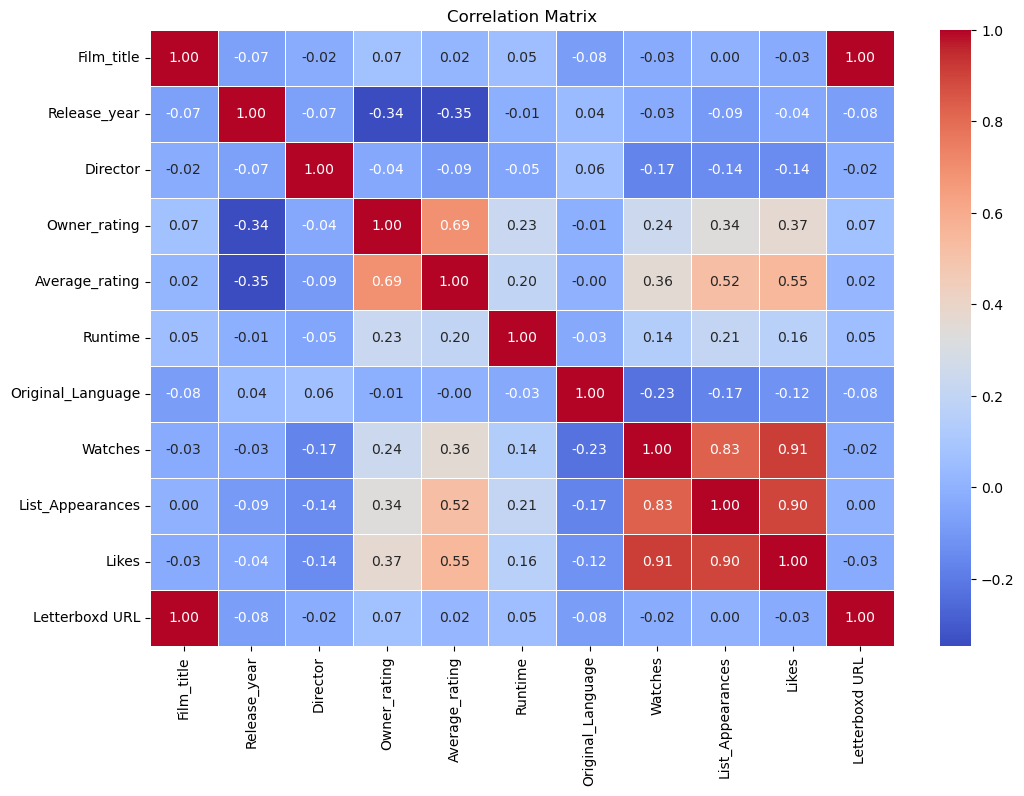

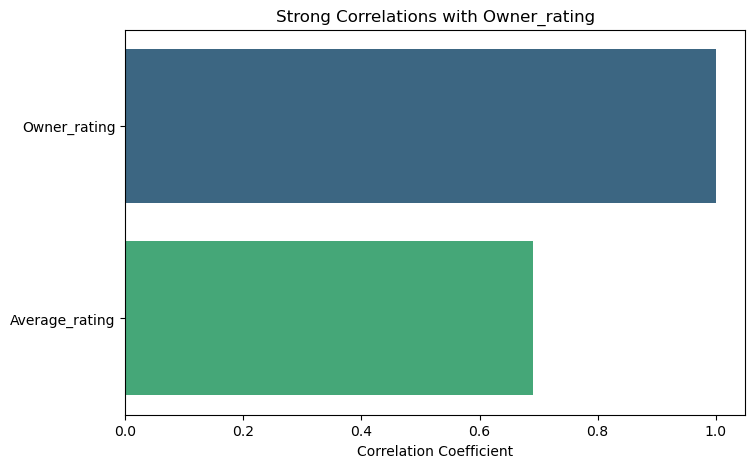

In [21]:

# Calculate correlations for all features
correlation_matrix = df_copy.corr()

# Highlight strong correlations with the target variable ('Owner_rating' in this case)
target_correlations = correlation_matrix['Owner_rating']

# Set the threshold for highlighting strong correlations
threshold = 0.5
strong_correlations = target_correlations[abs(target_correlations) > threshold]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

# Highlight strong correlations with the target variable
plt.figure(figsize=(8, 5))
sns.barplot(x=strong_correlations.values, y=strong_correlations.index, palette='viridis')
plt.title('Strong Correlations with Owner_rating')
plt.xlabel('Correlation Coefficient')
plt.show()


In [22]:

# Assuming you have your features (X) and target variable (y) ready
# X = df_cleaned.drop(columns=['Owner_rating'])  # Features
# y = df_cleaned['Owner_rating']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the regressor
regressor = DecisionTreeRegressor()

# Define the hyperparameter space to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    # Add more hyperparameters as needed
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # For regression, use a regression scoring metric
    cv=5,
    n_jobs=-1
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model with the best hyperparameters
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("Test Set Mean Squared Error:", test_mse)


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 10}
Test Set Mean Squared Error: 0.38685824800322915


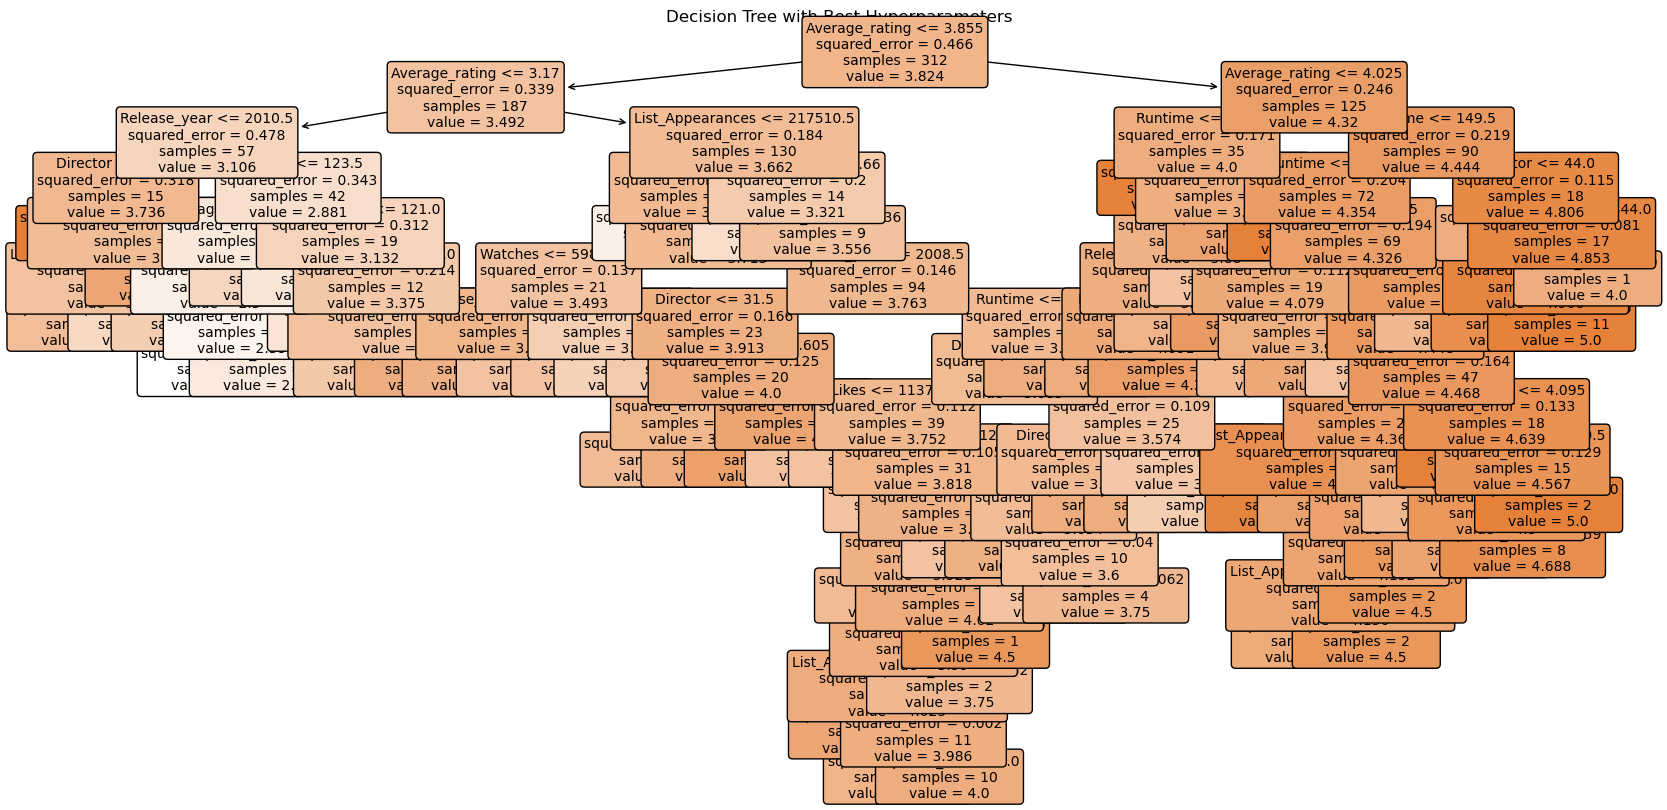

In [23]:

# Use the best hyperparameters obtained from GridSearchCV
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']

# Create and train the decision tree with the best hyperparameters
final_regressor = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
final_regressor.fit(X_train, y_train)

# Convert feature names to a list
feature_names_list = X.columns.tolist()

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(final_regressor, filled=True, feature_names=feature_names_list, rounded=True, fontsize=10)
plt.title("Decision Tree with Best Hyperparameters")
plt.show()



In [24]:

# Assuming final_regressor is your trained regression model
# Make predictions on the test set
y_pred_test = final_regressor.predict(X_test)

# Evaluate the performance using regression metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print the regression metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Absolute Error: 0.5066064449899527
Mean Squared Error: 0.42034352815517595
R-squared: -0.19810583122105196


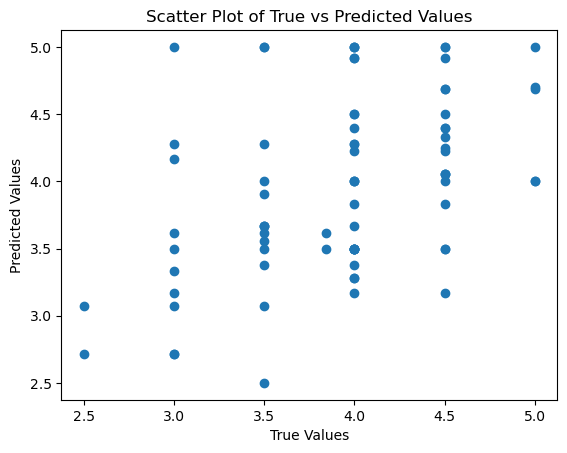

In [25]:


# Scatter plot of true values vs predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of True vs Predicted Values")
plt.show()


In [26]:


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred_test)
print(f'R-squared (R2) Score: {r2:.2f}')


Mean Absolute Error (MAE): 0.51
R-squared (R2) Score: -0.20
